# Import data 

In [71]:
import pandas as pd
import copy
from copy import deepcopy
df=pd.read_excel('Scheduling_NVDLA_original.xlsx')

### Breaking down AlexNet

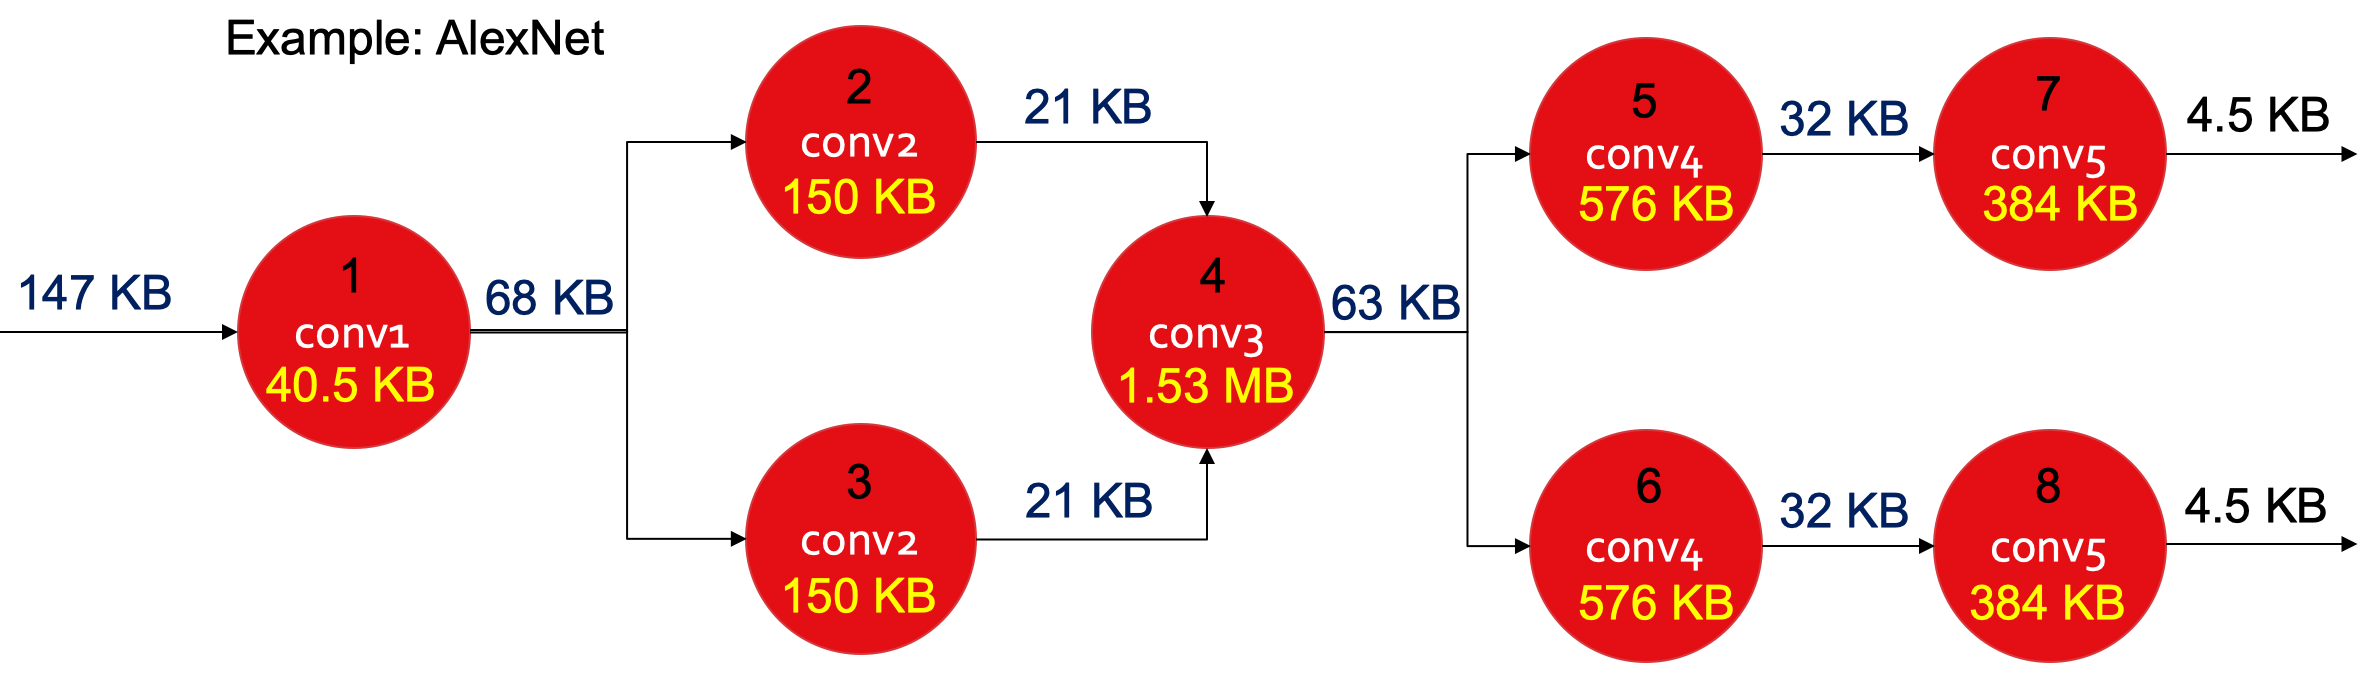

In [24]:
from IPython.display import Image
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
Image(filename="AlexNet.png", width=800, height=20)

### Input and Output Layers

In [47]:
input_ = [147, 68, 68, 42, 63, 63, 32, 32]

In [48]:
output_ = [68, 21, 21, 63, 32, 32, 4.5, 4.5]

In [49]:
num_out_16kernels

[6.0, 8.0, 8.0, 24.0, 12.0, 12.0, 8.0, 8.0]

In [50]:
DLA_input = deepcopy(DLA)
for i in range(8):
    for j in range(8):
        DLA_input.iloc[i][j]=(DLA.iloc[i][j]/num_out_16kernels[i])*input_[i] 

In [51]:
 DLA_input

,0,1,2,3,4,5,6,7
0,98,49,0,0,0,0,0,0
1,0,17,34,17,0,0,0,0
2,0,0,0,17,34,17,0,0
3,0,0,0,0,0,24,17,0
4,0,0,0,0,0,0,63,0
5,0,0,0,0,0,0,36,26
6,0,0,0,0,0,0,0,32
7,0,0,0,0,0,0,0,32


In [69]:
 tmp_i = DLA_input.sum(axis = 0, skipna = True) 

In [70]:
for i in range(8):
    print('input: required memory for DLA_%d: %d KB'%(i,tmp_i[i]))

input: required memory for DLA_0: 98 KB
input: required memory for DLA_1: 66 KB
input: required memory for DLA_2: 34 KB
input: required memory for DLA_3: 34 KB
input: required memory for DLA_4: 34 KB
input: required memory for DLA_5: 41 KB
input: required memory for DLA_6: 116 KB
input: required memory for DLA_7: 90 KB


In [62]:
DLA_output = deepcopy(DLA)
for i in range(8):
    for j in range(8):
        DLA_output.iloc[i][j]=(DLA.iloc[i][j]/num_out_16kernels[i])*output_[i] 

In [63]:
DLA_output

,0,1,2,3,4,5,6,7
0,45,22,0,0,0,0,0,0
1,0,5,10,5,0,0,0,0
2,0,0,0,5,10,5,0,0
3,0,0,0,0,0,36,26,0
4,0,0,0,0,0,0,32,0
5,0,0,0,0,0,0,18,13
6,0,0,0,0,0,0,0,4
7,0,0,0,0,0,0,0,4


In [67]:
 tmp_o = DLA_output.sum(axis = 0, skipna = True) 

In [68]:
for i in range(8):
    print('output: required memory for DLA_%d: %d KB'%(i,tmp_o[i]))

output: required memory for DLA_0: 45 KB
output: required memory for DLA_1: 27 KB
output: required memory for DLA_2: 10 KB
output: required memory for DLA_3: 10 KB
output: required memory for DLA_4: 10 KB
output: required memory for DLA_5: 41 KB
output: required memory for DLA_6: 76 KB
output: required memory for DLA_7: 21 KB


In [72]:
for i in range(8):
    print('input: required memory for DLA_%d: %d KB'%(i,tmp_i[i]))

input: required memory for DLA_0: 98 KB
input: required memory for DLA_1: 66 KB
input: required memory for DLA_2: 34 KB
input: required memory for DLA_3: 34 KB
input: required memory for DLA_4: 34 KB
input: required memory for DLA_5: 41 KB
input: required memory for DLA_6: 116 KB
input: required memory for DLA_7: 90 KB


In [65]:
df.head(17)

,number,Schedulling,layer_name,var_name,task,from_,to,dependencies,resource,var_size_KB,"cycles (emty if move, fill if conv)",Liveliness,sec_for_move,dla_sec,max_sec,Unnamed: 15,Unnamed: 16
0,1.0,1.0,1,w1,move,ddr,sram,NaN,NaN,40.5,NaN,[1-3],1.215190e-06,0.000000,0.000001,NaN,NaN
1,2.0,2.0,1,i1,move,ddr,sram,NaN,NaN,147.0,NaN,[2-3],4.410689e-06,0.000000,0.000004,NaN,NaN
2,3.0,3.0,1,o1,conv,sram,sram,"w1,i1",DLA_0,68.0,49617.0,[3-7],2.040319e-06,0.000032,0.000032,32.0,NaN
3,4.0,3.0,2a,w2a,move,ddr,sram,NaN,NaN,150.0,NaN,[4-6],4.500703e-06,0.000000,0.000005,NaN,NaN
4,5.0,4.0,2b,w2b,move,ddr,sram,NaN,NaN,150.0,NaN,[5-7],4.500703e-06,0.000000,0.000005,NaN,NaN
5,6.0,5.0,2a,o2a,conv,sram,sram,"o1,w2a",DLA_0,21.0,54675.0,[6-9],6.300985e-07,0.000036,0.000036,NaN,NaN
6,7.0,6.0,2b,o2b,conv,sram,sram,"o1,w2b",DLA_0,21.0,54675.0,[7-9],6.300985e-07,0.000036,0.000036,35.0,NaN
7,8.0,6.0,3,w3,move,ddr,sram,NaN,NaN,1536.0,NaN,[8-9],4.608720e-05,0.000000,0.000046,NaN,NaN
8,9.0,7.0,3,o3,conv,sram,sram,"o2a,o2b,w3",DLA_0,63.0,32448.0,[9-13],1.890295e-06,0.000021,0.000021,21.0,NaN
9,10.0,7.0,4a,w4a,move,ddr,sram,NaN,NaN,576.0,NaN,[10-12],1.728270e-05,0.000000,0.000017,NaN,NaN


In [26]:
max_allow = 22e-6    

num_out_kernels = [96, 128, 128 , 384, 192, 192, 128, 128]
#hardware limitation 
num_out_16kernels = [i/16 for i in num_out_kernels]
Unit_of_time = []

c=0
weights = []
for i in range(17):
    if df.task[i][0] =='c':
        Unit_of_time.append(df.max_sec[i]/num_out_16kernels[c])
        #weights.append(df.var_size_KB[i])
        c+=1
for i in range(17):
    if df.task[i][0] =='w':
        #Unit_of_time.append(df.max_sec[i]/num_out_16kernels[c])
        weights.append(df.var_size_KB[i])
        c+=1
c=0
DLA_time = []
for i in range(17):
    if df.task[i][0] =='c':
        DLA_time.append(df.max_sec[i])
#DLA_time

In [27]:
DLA_time

[3.2302734375e-05,
 3.5595703125e-05,
 3.5595703125e-05,
 2.1125e-05,
 7.921875e-06,
 7.921875e-06,
 5.28125e-06,
 5.28125e-06]

#### Balancing the AlexNet

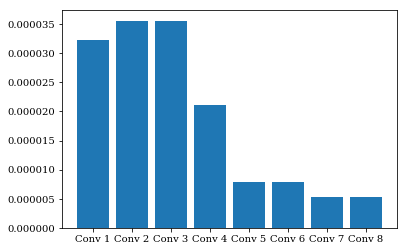

In [28]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 10})


x = np.arange(8)
time = [3.2302734375e-05,
 3.5595703125e-05,
 3.5595703125e-05,
 2.1125e-05,
 7.921875e-06,
 7.921875e-06,
 5.28125e-06,
 5.28125e-06]

plt.bar(x, time)
plt.xticks(x, ('Conv 1', 'Conv 2', 'Conv 3', 'Conv 4','Conv 5', 'Conv 6', 'Conv 7', 'Conv 8'))
plt.show()

In [29]:
weights=[]
for i in range(17):
    #print(df.var_name[i][0])
    if df.var_name[i][0] =='w':
        #Unit_of_time.append(df.max_sec[i]/num_out_16kernels[c])
        weights.append(df.var_size_KB[i])
        c+=1

In [30]:
weights

[40.5, 150.0, 150.0, 1536.0, 576.0, 576.0, 384.0, 384.0]

In [31]:
num_out_kernels = [96, 128, 128 , 384, 192, 192, 128, 128]
[i/16 for i in num_out_kernels]

[6.0, 8.0, 8.0, 24.0, 12.0, 12.0, 8.0, 8.0]

In [32]:
Unit_of_time

[5.3837890625000005e-06,
 4.449462890625e-06,
 4.449462890625e-06,
 8.802083333333333e-07,
 6.6015625e-07,
 6.6015625e-07,
 6.6015625e-07,
 6.6015625e-07]

In [33]:
import pandas as pd
DLA = [[0]*8]*8
DLA = pd.DataFrame(DLA)
import copy
from copy import deepcopy
DLA_t = deepcopy(DLA_time)

In [84]:
import copy
from copy import deepcopy
DLA_t = deepcopy(DLA_time)
num_out_16kernels_t = deepcopy(num_out_16kernels)
basket = [20e-6] * 8
DLA = [[0]*8]*8
DLA = pd.DataFrame(DLA)
for j in range(8):
    print ('\navailable resources:')
    print(basket)
    print ('\nrequired resources for the conv%d'%(j+1))
    print(DLA_t[j])
    temp = 0
    c = 0
    index = []
    #num = []
    while (DLA_t[j] > temp):
        if basket [c] != 0:
            temp += basket[c]
            index.append(c)
        c+=1
    num=[]
    for i in index:
        #print(basket[i]//Unit_of_time[i])
        #print(num_out_16kernels_t[i])
        
        if basket[i]//Unit_of_time[j] <= num_out_16kernels_t[j]:
            num_out_16kernels_t[j] = num_out_16kernels_t[j] - (basket[i]//Unit_of_time[j])
            num.append((basket[i]//Unit_of_time[j]))
            basket[i] = basket[i] - num[-1] * Unit_of_time[j]
        else:
            #num_out_16kernels_t[i] = num_out_16kernels_t[i] - (basket[i]//Unit_of_time[i])
            num.append((num_out_16kernels_t[j])) 
            
            basket[i] = basket[i] - num[-1] * Unit_of_time[j]
            for a in range(i):
                basket[a] = 0
            num_out_16kernels_t[j] = 0
            
    for ID, i in enumerate(index):
        DLA.iloc[j][i]=num[ID]
#print(index)
#print(num)    
#print(num_out_16kernels_t)  

(DLA)      


available resources:
[2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05]

required resources for the conv1
3.2302734375e-05

available resources:
[3.8486328125e-06, 3.8486328125e-06, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05, 2e-05]

required resources for the conv2
3.5595703125e-05

available resources:
[3.8486328125e-06, 3.8486328125e-06, 2.2021484375e-06, 2.2021484375e-06, 2e-05, 2e-05, 2e-05, 2e-05]

required resources for the conv3
3.5595703125e-05

available resources:
[3.8486328125e-06, 3.8486328125e-06, 2.2021484375e-06, 2.2021484375e-06, 2.2021484375e-06, 2.2021484375e-06, 2e-05, 2e-05]

required resources for the conv4
2.1125e-05

available resources:
[0, 0, 0, 0, 0, 0, 1.2958333333333334e-05, 2e-05]

required resources for the conv5
7.921875e-06

available resources:
[0, 0, 0, 0, 0, 0, 5.036458333333335e-06, 2e-05]

required resources for the conv6
7.921875e-06

available resources:
[0, 0, 0, 0, 0, 0, 0, 1.669921875e-05]

required resources for the conv7
5.28125e-06

available

,0,1,2,3,4,5,6,7
0,3,3,0,0,0,0,0,0
1,0,0,4,4,0,0,0,0
2,0,0,0,0,4,4,0,0
3,4,4,2,2,2,2,8,0
4,0,0,0,0,0,0,12,0
5,0,0,0,0,0,0,7,5
6,0,0,0,0,0,0,0,8
7,0,0,0,0,0,0,0,8


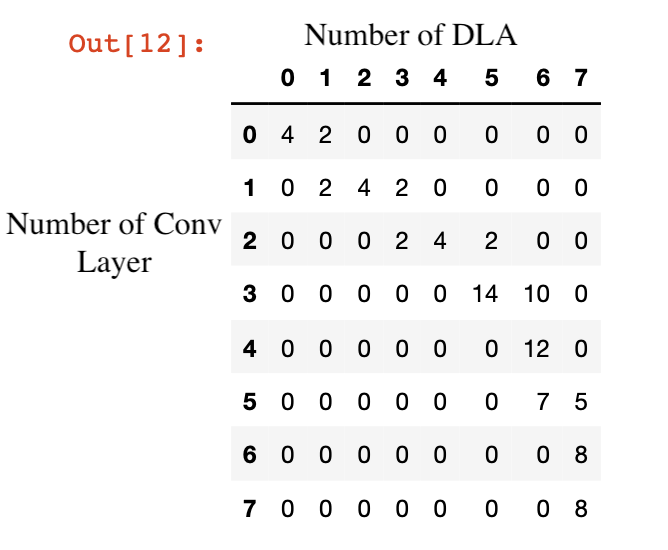

In [85]:
Image(filename="DLA.png", width=400, height=20)

In [86]:
weights_L=deepcopy(DLA)   
total=DLA.sum(axis=1)
for i in range(8):
    for j in range(8):
        if DLA.iloc[i][j] != 0:
            weights_L.iloc[i][j] = weights[i] *(DLA.iloc[i][j]/total[i])
        

In [87]:
weights_L

,0,1,2,3,4,5,6,7
0,20,20,0,0,0,0,0,0
1,0,0,75,75,0,0,0,0
2,0,0,0,0,75,75,0,0
3,256,256,128,128,128,128,512,0
4,0,0,0,0,0,0,576,0
5,0,0,0,0,0,0,336,240
6,0,0,0,0,0,0,0,384
7,0,0,0,0,0,0,0,384


### DLA pairing

In [88]:
weight_total=weights_L.sum(axis=0)
for i in range(8):
    print('weight: required SRAM memory for DLA_%d: %f'%(i,weight_total[i]))
#weight_total

weight: required SRAM memory for DLA_0: 276.000000
weight: required SRAM memory for DLA_1: 276.000000
weight: required SRAM memory for DLA_2: 203.000000
weight: required SRAM memory for DLA_3: 203.000000
weight: required SRAM memory for DLA_4: 203.000000
weight: required SRAM memory for DLA_5: 203.000000
weight: required SRAM memory for DLA_6: 1424.000000
weight: required SRAM memory for DLA_7: 1008.000000


#### color map

In [89]:
import matplotlib.pyplot as plt
import numpy as np
colors =  plt.cm.tab10( np.arange(0,10,1).astype(int) )
#plt.scatter(np.arange(15),np.ones(15), c=colors, s=180)

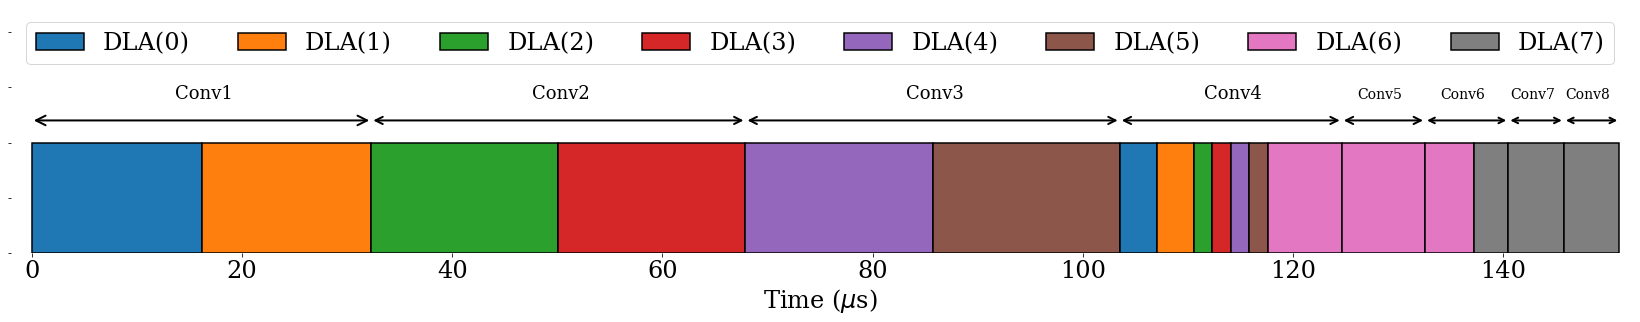

In [90]:
import seaborn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 24})
from matplotlib import rc
from matplotlib.patches import Rectangle
from copy import deepcopy
import matplotlib.pyplot as mplot
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap

font = {'family' : 'serif',}
rc('font', **font)
fig_w=25.5
fig_h=5

f, ((ax1)) = plt.subplots(1, 1, sharex='col' ,figsize=(fig_w ,fig_h))

#plt.text(0, 0.6,s=(2), family='serif',color='black')
#plt.annotate(s='', xy=(0,1.1), xytext=(1,1.1),arrowprops=dict(arrowstyle='<->',color='r',lw=2))

#c=next(color)
[m, n] = DLA.shape

#print(count)
st=0
#for i in range(count):

#DLA colors
color = ['navy','red','yellow','green','palegreen',
         'yellow','brown','pink']
for i in range(m):
    for j in range(n):
        if DLA.iloc[i][j] != 0:   
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            someX, someY = st, 0
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((someX, someY),DLA.iloc[i][j]*Unit_of_time[i]*1e6, 
            1,alpha=1,facecolor=colors[j],edgecolor='k',lw=1.5, label=('DLA(%d)'%j)))
            st += DLA.iloc[i][j]*Unit_of_time[i]*1e6
st=0
h = 1.2
plt.rcParams.update({'font.size': 24})
for i in range(m):
    plt.annotate(s='', xy=(st,h), xytext=(st+sum(DLA.iloc[i])*Unit_of_time[i]*1e6,h),
                 arrowprops=dict(arrowstyle='<->',color='k',lw=2))
    if i >= 4:
        plt.rcParams.update({'font.size': 14})
    else:
        plt.rcParams.update({'font.size': 18})
    plt.text(st-2.5+(sum(DLA.iloc[i])*Unit_of_time[i]*1e6)/2, h+0.2,s=('Conv%d')%(i+1), family='serif',color='black')
    st += sum(DLA.iloc[i])*Unit_of_time[i]*1e6
plt.rcParams.update({'font.size': 24})
#plt.grid()
plt.ylim([0,2.2])
plt.xlim([-2,152])
from collections import OrderedDict
import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=8,loc=9, )
cur_axes = mplot.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])
seaborn.despine(left=True, bottom=True, right=True)
plt.xlabel('Time ($\mu$s)')
plt.tight_layout()
plt.savefig('Pipeline.png',dpi=300)
plt.show()

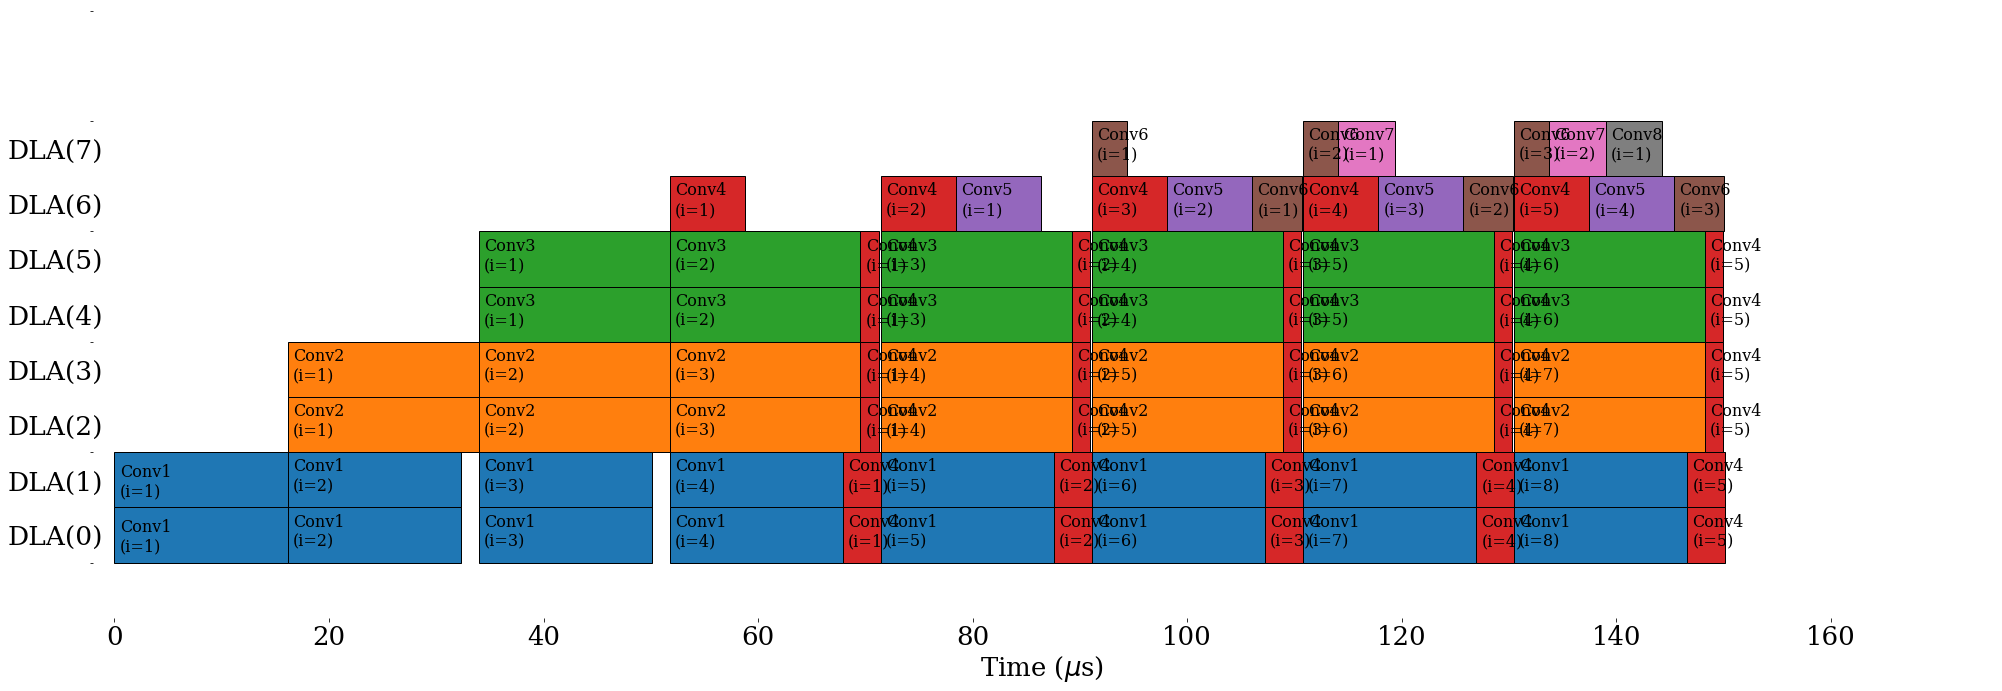

In [91]:
import seaborn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 26})
from matplotlib import rc
from matplotlib.patches import Rectangle
from copy import deepcopy
import matplotlib.pyplot as mplot
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap

font = {'family' : 'serif',}
rc('font', **font)
fig_w=28

fig_h=10

DLA_st=[0]*8
f, ((ax1)) = plt.subplots(1, 1, sharex='col' ,figsize=(fig_w ,fig_h))

#plt.text(0, 0.6,s=(2), family='serif',color='black')
#plt.annotate(s='', xy=(0,1.1), xytext=(1,1.1),arrowprops=dict(arrowstyle='<->',color='r',lw=2))

#c=next(color)
[m, n] = DLA.shape

#print(count)
st=0
#for i in range(count):

#DLA colors
color = ['navy','red','yellow','green','palegreen',
         'yellow','brown','pink']





plt.rcParams.update({'font.size': 16})

for i in range(1):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            plt.rcParams.update({'font.size': 16})            
            plt.text(DLA_st[j]+0.5, j+0.2,
                     s=('Conv%d\n(i=%d)')%(i+1,i+1), family='serif',color='black')




            
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(2):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            
            if i !=1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,i+2), family='serif',color='black')
            else:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,i), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(3):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            #print(i)
            if i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,i-1), family='serif',color='black')
            elif i == 1:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,i+1), family='serif',color='black')
                #print('yes')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
                
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(4):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 2:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
                
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(5):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 4:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 3:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,5), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(6):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 5:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 4:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,5), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,6), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(7):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 6:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 5:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 4:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,5), family='serif',color='black')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,6), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,7), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(8):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 7:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 6:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 5:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 4:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,5), family='serif',color='black')
            elif i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,6), family='serif',color='black')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,7), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,8), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6

plt.rcParams.update({'font.size': 26.5})


for i in range(8):
    plt.text(-10, i+0.3, s=('DLA(%d)'%i), family='serif',color='black')

#plt.rcParams.update({'font.size': 47.1})


#plt.grid()
plt.ylim([-1,10])
plt.xlim([-2,175])


from collections import OrderedDict
import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), ncol=8,loc=9, )
cur_axes = mplot.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])
seaborn.despine(left=True, bottom=True, right=True)
plt.rcParams.update({'font.size': 20})
plt.xlabel('Time ($\mu$s)')
#plt.grid()
plt.tight_layout()
plt.savefig('Pipeline_8.png',dpi=300)
plt.show()

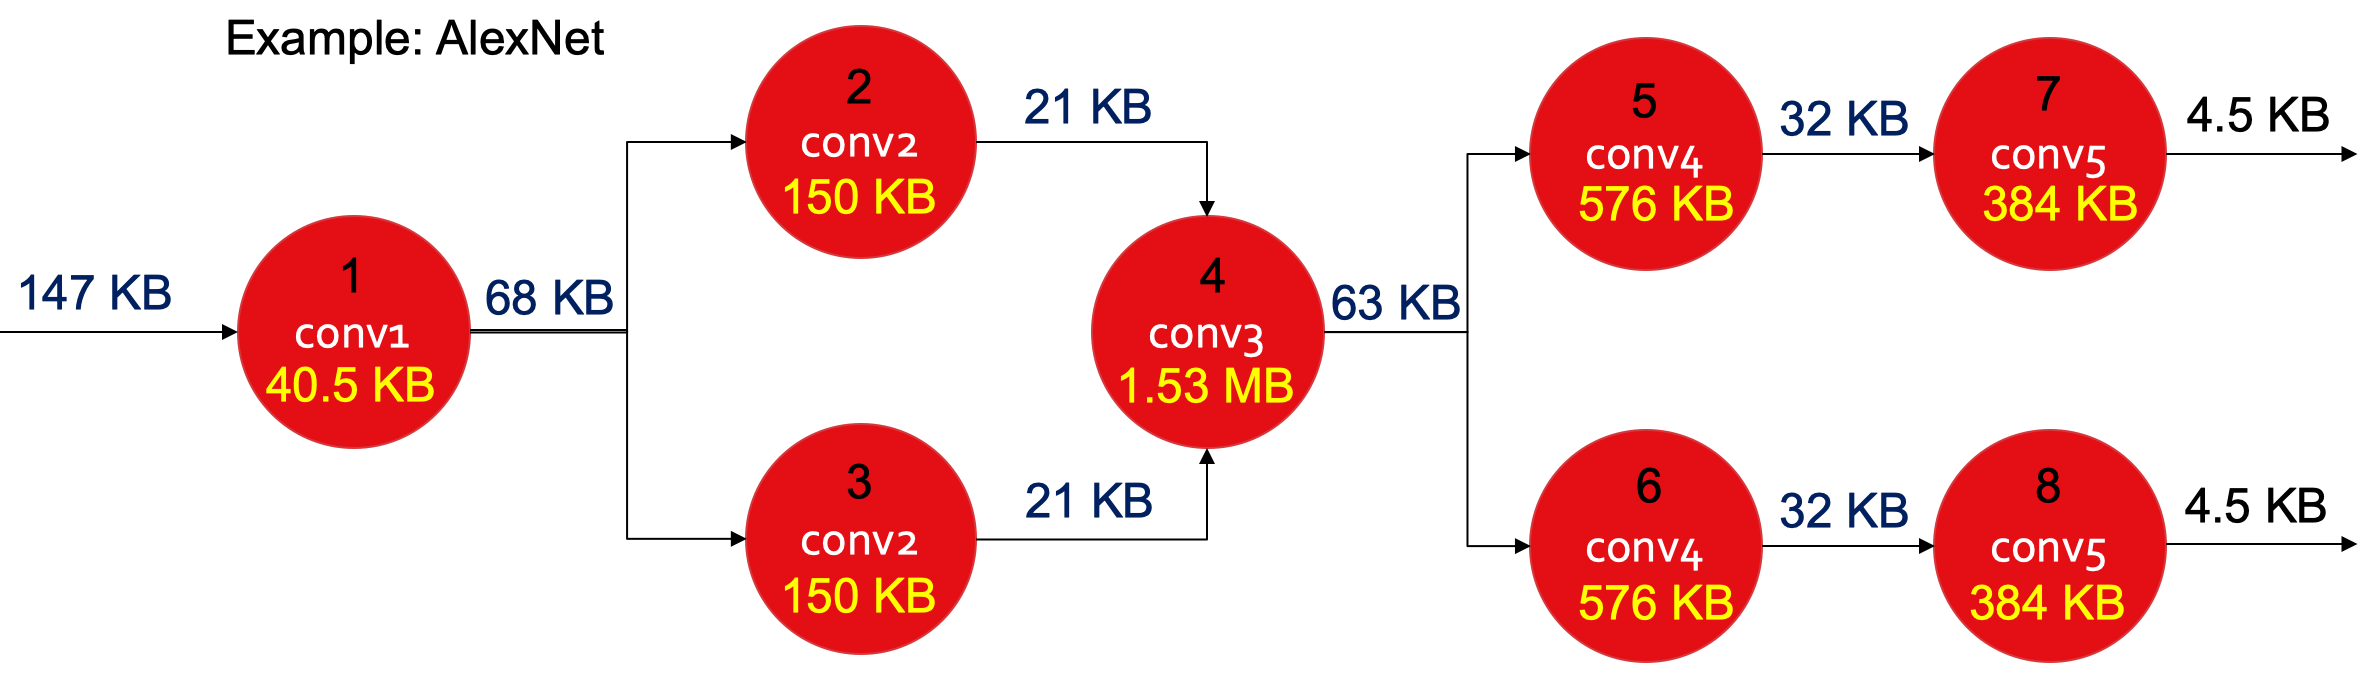

In [92]:
from IPython.display import Image
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
Image(filename="AlexNet.png", width=800, height=20)

In [93]:
execution_time=[]
for i in range(8):
    temp=0
    for j in range(8):
        temp+=(DLA.iloc[j][i]*Unit_of_time[j])
    execution_time.append(temp)
max(execution_time)
execution_percentage=(execution_time/(max(execution_time)))*100

In [94]:
print(execution_percentage//1)
sum(execution_percentage)/8//1

[100. 100.  99.  99.  99.  99.  99.  70.]


95.0

### Next task: consider dependencies

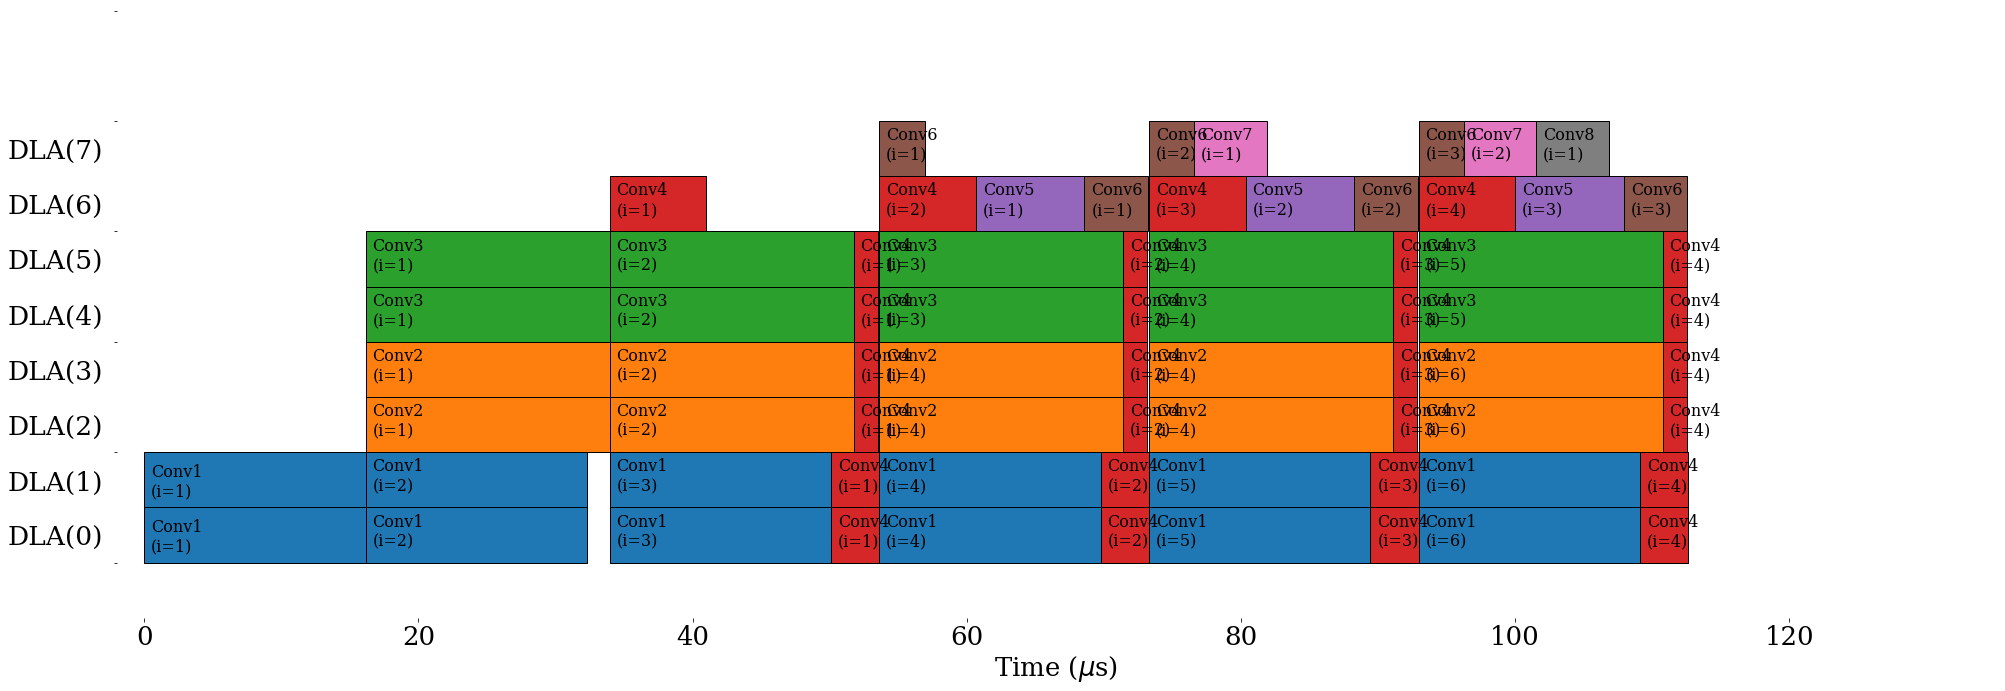

In [95]:
import seaborn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 26})
from matplotlib import rc
from matplotlib.patches import Rectangle
from copy import deepcopy
import matplotlib.pyplot as mplot
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap

font = {'family' : 'serif',}
rc('font', **font)
fig_w=28

fig_h=10

DLA_st=[0]*8
f, ((ax1)) = plt.subplots(1, 1, sharex='col' ,figsize=(fig_w ,fig_h))

#plt.text(0, 0.6,s=(2), family='serif',color='black')
#plt.annotate(s='', xy=(0,1.1), xytext=(1,1.1),arrowprops=dict(arrowstyle='<->',color='r',lw=2))

#c=next(color)
[m, n] = DLA.shape

#print(count)
st=0
#for i in range(count):

#DLA colors
color = ['navy','red','yellow','green','palegreen',
         'yellow','brown','pink']





plt.rcParams.update({'font.size': 16})

for i in range(1):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            plt.rcParams.update({'font.size': 16})            
            plt.text(DLA_st[j]+0.5, j+0.2,
                     s=('Conv%d\n(i=%d)')%(i+1,i+1), family='serif',color='black')




            
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(3):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            #print(i)
            if i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 1:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
                #print('yes')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(4):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 2:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
                
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6

#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(6):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 5:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 4:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
                #print('yes')
            elif i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
            elif i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(7):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 6:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 5:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 4:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
            elif i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,5), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6
#####################################################################
Max=np.amax(DLA_st)
for i in range(len(DLA_st)):
    DLA_st[i] = Max

for i in range(8):
    for j in range(8):
        if DLA.iloc[i][j] != 0: 
            #print('yes')
            #print(st)
            #print(DLA.iloc[i][j])
            #print(DLA_st[j])
            #print(j)
            someX, someY = DLA_st[j], j
            currentAxis = plt.gca()
            currentAxis.add_patch(Rectangle((DLA_st[j], j),DLA.iloc[i][j]*Unit_of_time[i]*1e6, (1),
            alpha=1,facecolor=colors[i],edgecolor='k',lw=1, label=('DLA(%d)'%j)))
            if i == 7:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,1), family='serif',color='black')
            elif i == 6:
                #print(i)
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,2), family='serif',color='black')
                #print('yes')
            elif i == 5:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 4:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,3), family='serif',color='black')
            elif i == 3:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,4), family='serif',color='black')
            elif i == 2:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,5), family='serif',color='black')
            elif i == 1:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,6), family='serif',color='black')
            elif i == 0:
                plt.text(DLA_st[j]+0.5, j+0.3,
                         s=('Conv%d\n(i=%d)')%(i+1,6), family='serif',color='black')
            DLA_st[j] += DLA.iloc[i][j]*Unit_of_time[i]*1e6

plt.rcParams.update({'font.size': 26.5})


for i in range(8):
    plt.text(-10, i+0.3, s=('DLA(%d)'%i), family='serif',color='black')

#plt.rcParams.update({'font.size': 47.1})


#plt.grid()
plt.ylim([-1,10])
plt.xlim([-2,135])


from collections import OrderedDict
import matplotlib.pyplot as plt

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), ncol=8,loc=9, )
cur_axes = mplot.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])
seaborn.despine(left=True, bottom=True, right=True)
plt.rcParams.update({'font.size': 20})
plt.xlabel('Time ($\mu$s)')
#plt.grid()
plt.tight_layout()
plt.savefig('Pipeline_8.png',dpi=300)
plt.show()

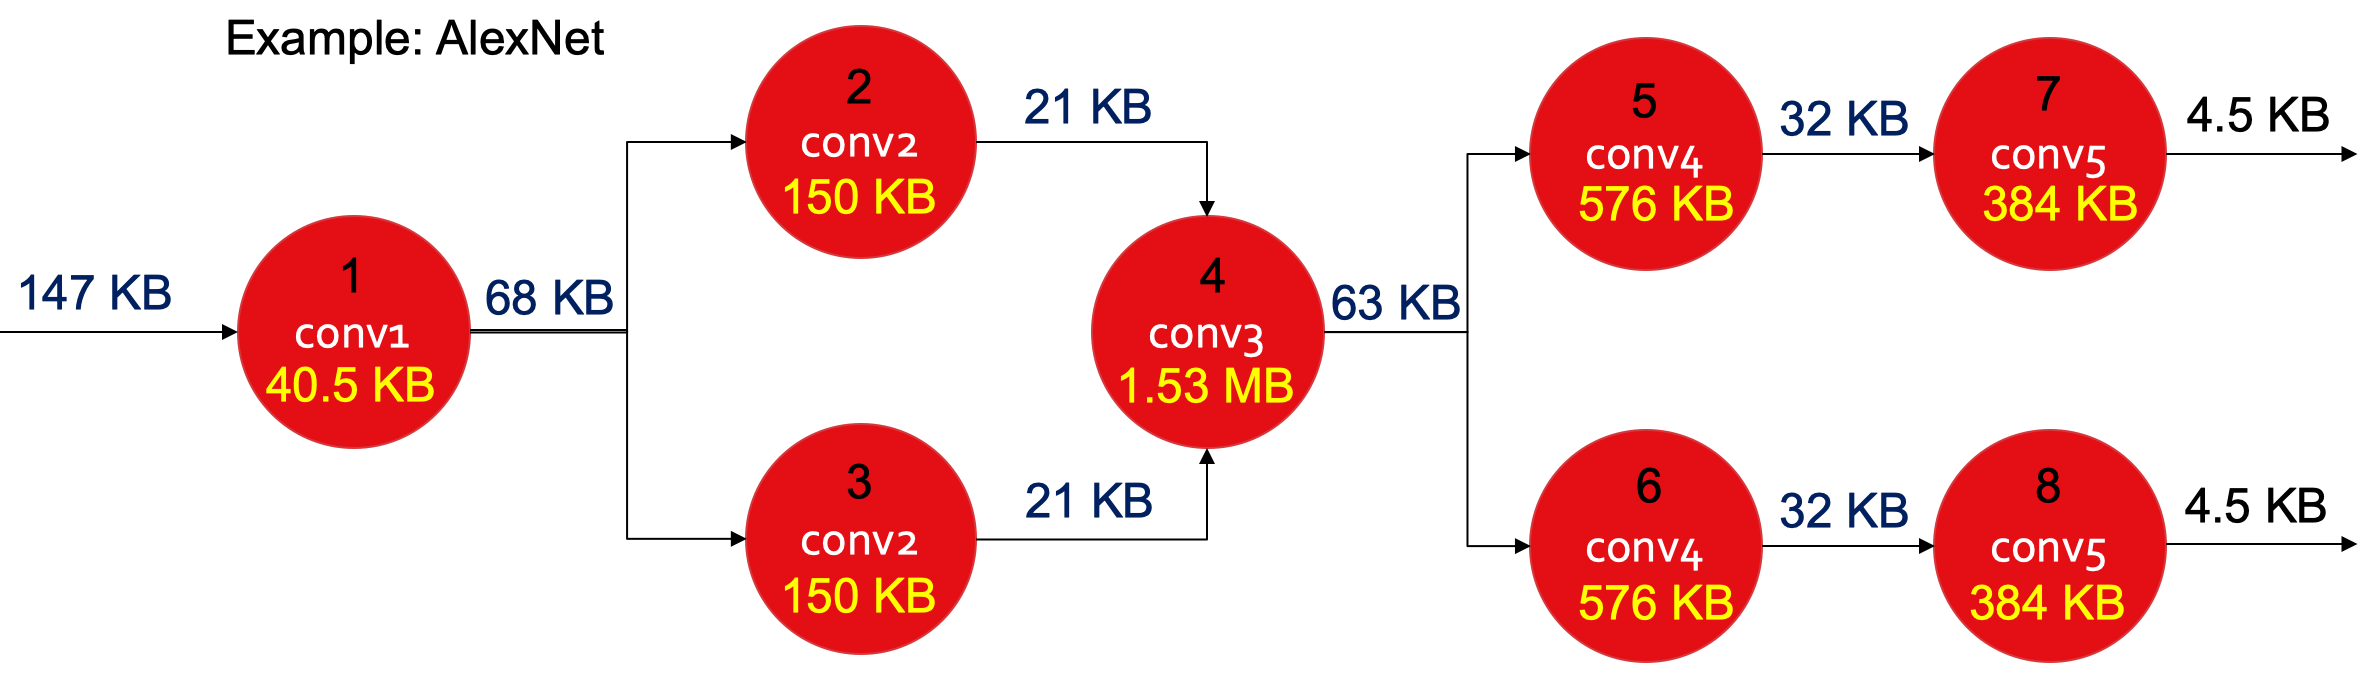

In [75]:
from IPython.display import Image
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
Image(filename="AlexNet.png", width=800, height=20)